
## Simarpreet Kaur Vijay Singh Khalsa 


### Data Science And Business Analytics Intern @ The Sparks Foundation


### GRIP : Graduate Rotational Internship Programme

<b>Task #3- Exploratory Data Analysis On Retail Store Dataset</b>

<b>AIM: To find out the weak areas using data visualization where we can work in order to make more profit</b>

In [1]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import geopandas as gpd
import seaborn as sns


In [17]:
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
#loading the dataset
data=pd.read_csv("SampleSuperstore.csv")
print(data.shape)

(9994, 13)


In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()#required statistics of the dataset

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.duplicated().sum()

17

In [8]:
data.drop_duplicates()
data = data.drop('Postal Code', axis=1)#not needed to derive conclusions

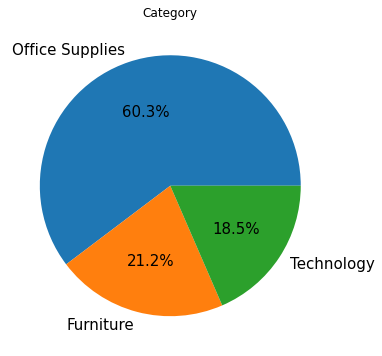

In [9]:
#piechart to determine the weightage of each category present in the superstore
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

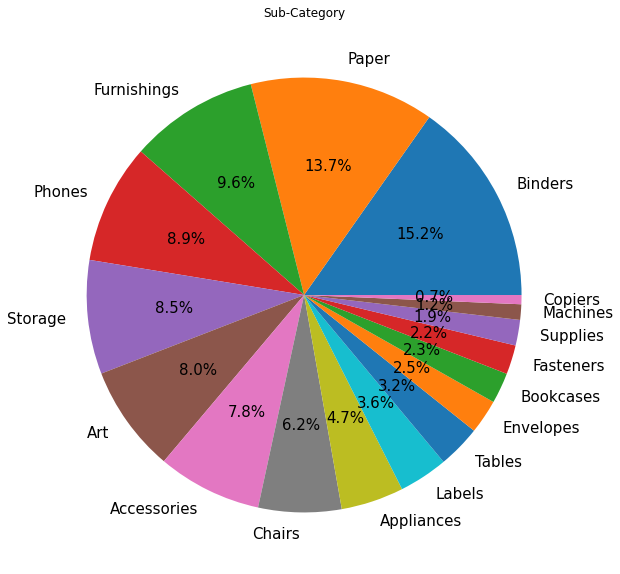

In [10]:
plt.figure(figsize = (10,10))
textprops = {"fontsize":15}
plt.title('Sub-Category')
plt.pie(data['Sub-Category'].value_counts(), labels=data['Sub-Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

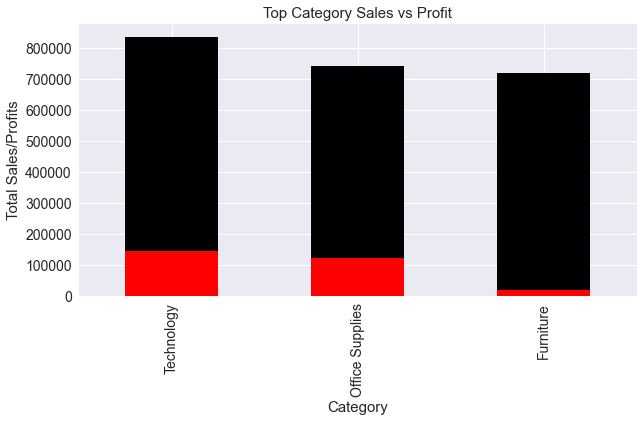

In [25]:
top_category_s = data.groupby("Category").Sales.sum().nlargest(n=200)
top_category_p = data.groupby("Category").Profit.sum().nlargest(n=200)
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color="black")
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

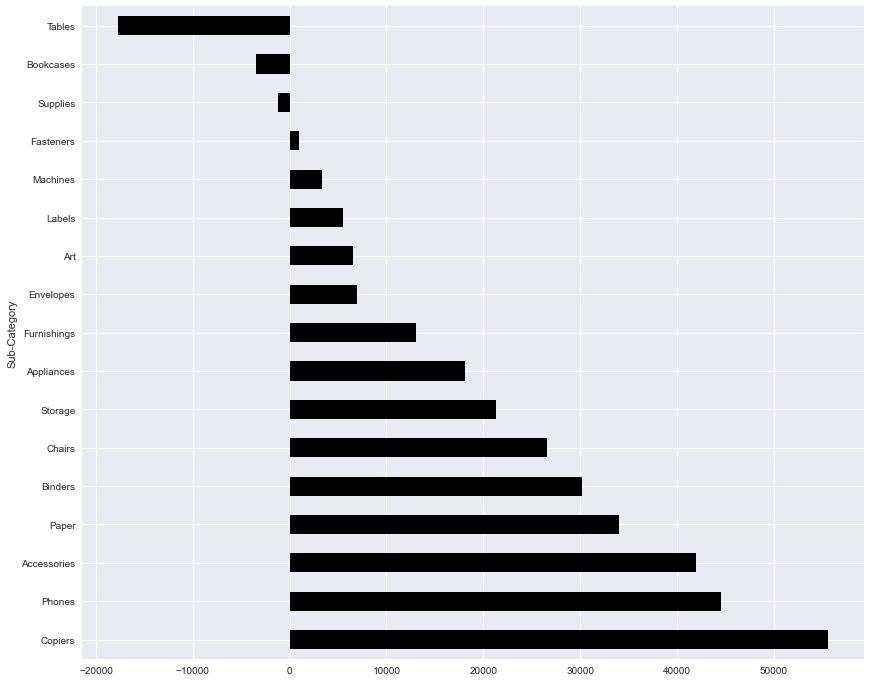

In [24]:
plt.figure(figsize=(14,12))
statewise = data.groupby(['Sub-Category'])['Profit'].sum().nlargest(200)
statewise.plot.barh(color="black") 

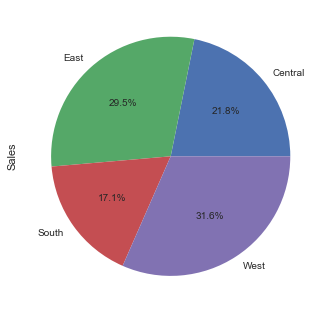

In [13]:
data.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.1f%%")
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

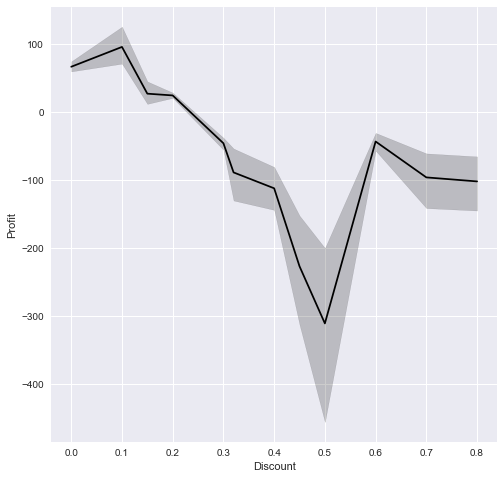

In [19]:
plt.figure(figsize=(8,8))
sns.lineplot(data['Discount'], data['Profit'], data=data, color="black")

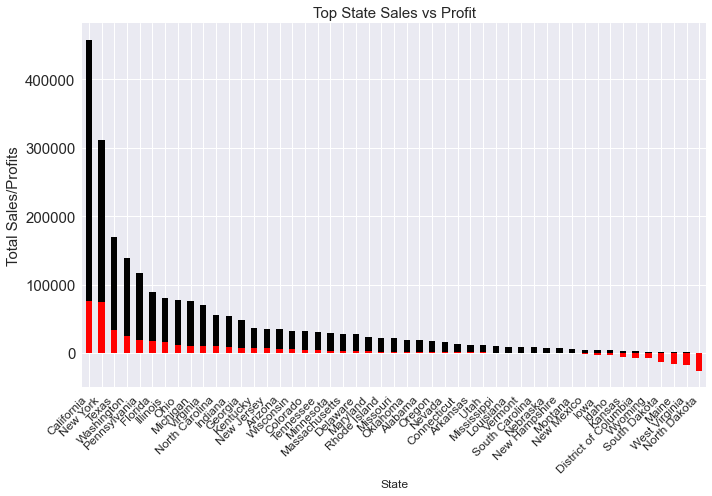

In [45]:
top_category_s = data.groupby("State").Sales.sum().nlargest(n=200)
top_category_p = data.groupby("State").Profit.sum().nlargest(n=200)
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,7),fontsize = 15, color="black")
top_category_p.plot(kind = 'bar',figsize = (10,7),fontsize = 15,color='red')
plt.xlabel('State',fontsize = 12)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top State Sales vs Profit",fontsize = 15)
plt.xticks(rotation=45)
plt.gca().set_xticks(range(len(top_category_s.index)))
plt.gca().set_xticklabels(top_category_s.index, rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='State'>

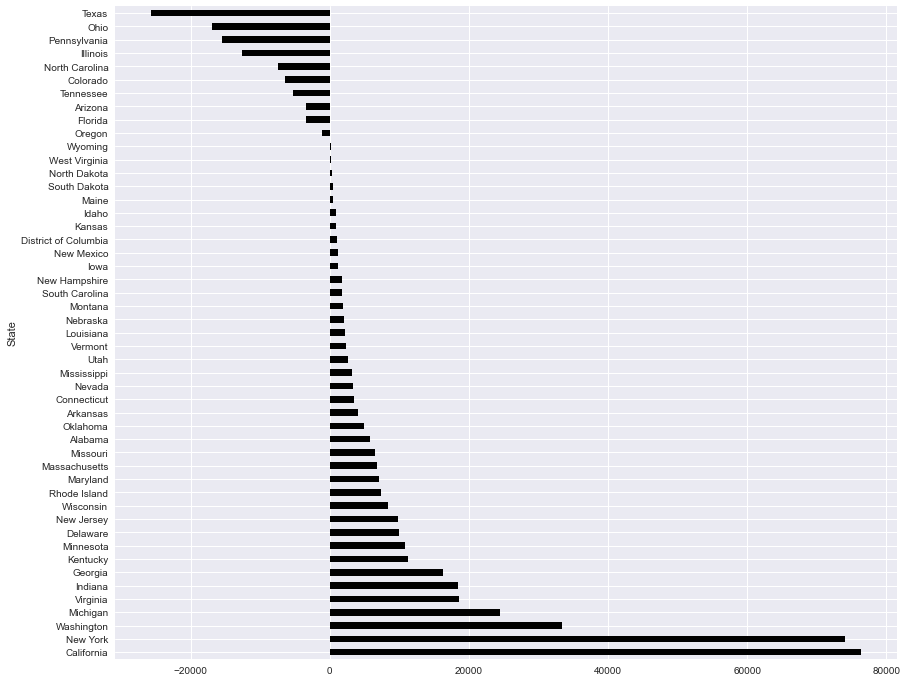

In [46]:
plt.figure(figsize=(14,12))
statewise = data.groupby(['State'])['Profit'].sum().nlargest(200)
statewise.plot.barh(color="black") 

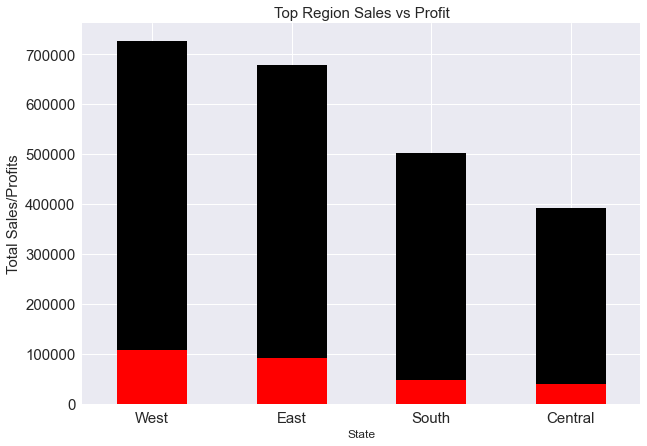

In [53]:
top_category_s = data.groupby("Region").Sales.sum().nlargest(n=200)
top_category_p = data.groupby("Region").Profit.sum().nlargest(n=200)
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,7),fontsize = 15, color="black")
top_category_p.plot(kind = 'bar',figsize = (10,7),fontsize = 15,color='red')
plt.xlabel('State',fontsize = 12)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Region Sales vs Profit",fontsize = 15)
plt.xticks(rotation=360)
plt.show()

## Conclusions:
<b> The profits of the furniture category are very less as compared to the sales.</b>

<b> The sales of technology category can be increased as they provide a good amount of profit.</b>

<b> The sales in states like North Dakota, Virginia and Maine should be stopped because of huge losses. </b>

